In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import classification_report, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm

import keras
import os
from skimage.transform import resize
from skimage import io
import cv2
import imageio
import pickle
import warnings
from tqdm import tqdm
import multiprocessing as multi

/Users/aaronfrederick/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")

In [3]:
###  DO NOT RUN, CONTENTS ALREADY RESIZED  ###

###  Resizes Images in raw and saves in 'sized'  ###

# for file in tqdm(os.listdir("raw/")):
#     if file.endswith('.jpg'):
#         path = "raw/" + file
#         img = io.imread(path, as_grey=False)
#         resized = resize(img, (32, 32))
#         io.imsave(f'sized/{file[:-4]}.png', resized)

In [3]:
###  Reads images from file into a numpy array and stores in list 'images'  ###

raw_images = []
for file in tqdm(os.listdir("sized/")):
    if file.endswith('.png'):
        raw_images.append(np.asarray(cv2.imread(f"sized/{file}")))


100%|██████████| 744/744 [00:00<00:00, 1758.10it/s]


In [11]:
proc_img = []
for file in tqdm(os.listdir("processed/")):
    if file.endswith('.png'):
        proc_img.append(np.asarray(cv2.imread(f"processed/{file}")))


 95%|█████████▍| 27953/29512 [00:14<00:00, 1909.96it/s]


100%|██████████| 29512/29512 [00:15<00:00, 1955.44it/s]

In [12]:
reshaped = [np.reshape(matrix, (1,-1)) for matrix in raw_images]
reshaped = np.array(reshaped)
reshaped.shape

(743, 1, 3072)

In [14]:
reshaped2 = [np.reshape(matrix, (1,-1)) for matrix in proc_img]
reshaped2 = np.array(reshaped2)
reshaped2.shape


(29512, 1, 3072)

In [15]:
reshaped = reshaped.reshape(743,3072)
reshaped.shape

(743, 3072)

In [16]:
reshaped2 = reshaped2.reshape(29512,3072)

In [6]:
#experimenting with code from https://machinelearningmastery.com/image-augmentation-deep-learning-keras/

#DO NOT RUN CELL, THIS IS FOR PREPARING TRANSFORMATION CELL

newtry = reshaped.reshape(743,32,32,3)
newtry


array([[[[241, 240, 249],
         [164, 167, 173],
         [155, 171, 178],
         ...,
         [214, 219, 240],
         [214, 219, 240],
         [218, 220, 238]],

        [[110, 123,  94],
         [240, 242, 249],
         [141, 157, 156],
         ...,
         [192, 167,  71],
         [191, 164,  60],
         [185, 158,  48]],

        [[ 22,  28,   9],
         [244, 242, 248],
         [146, 160, 166],
         ...,
         [153, 122,  45],
         [209, 187, 147],
         [205, 185, 152]],

        ...,

        [[ 91, 111, 136],
         [ 93, 112, 126],
         [103, 126, 128],
         ...,
         [ 54,  84, 125],
         [ 55,  79, 108],
         [ 29,  52,  59]],

        [[102, 121, 142],
         [ 97, 115, 114],
         [119, 133, 132],
         ...,
         [ 59,  89, 125],
         [ 37,  62,  84],
         [ 83, 107, 123]],

        [[105, 120, 115],
         [102, 120, 119],
         [109, 127, 126],
         ...,
         [ 42,  71, 110],
        

In [10]:
             ###  Making Transformations on the Positive Data Set  ###
       ###  NOTE: The cell has been run and images generated, do not run again  ###
# code from https://machinelearningmastery.com/image-augmentation-deep-learning-keras/ #


combo = keras.preprocessing.image.ImageDataGenerator(rotation_range=30,width_shift_range=0.1, 
                                                      height_shift_range=0.1)

count = 0
for batch in combo.flow(newtry,batch_size = 9, save_to_dir='processed', save_prefix = f'transf', save_format='png'):
    if count < 3300:   #This number generates ~30,000 images
        count += 1
        pass
    else:
        break

In [19]:
pos_df_raw = pd.DataFrame(reshaped)
pos_df_raw['Edel'] = 1    #Maybe this line should come after the transformations

In [20]:
pos_df_raw

,0,1,2,3,4,5,6,7,8,9,...,3063,3064,3065,3066,3067,3068,3069,3070,3071,Edel
0,241,240,249,164,167,173,155,171,178,146,...,42,71,110,30,52,58,35,55,71,1
1,221,143,97,223,144,101,223,144,97,222,...,182,185,189,182,185,189,176,180,181,1
2,48,44,55,46,41,55,39,37,55,42,...,211,196,210,216,201,215,239,234,239,1
3,59,85,91,57,83,89,61,89,89,64,...,225,209,192,255,254,251,237,249,255,1
4,238,236,228,240,237,233,240,238,230,241,...,74,78,79,103,103,103,115,115,115,1
5,8,9,19,5,6,16,2,2,14,4,...,16,8,103,34,23,116,34,20,126,1
6,37,35,35,37,35,35,37,35,35,37,...,172,139,92,176,152,102,36,34,36,1
7,80,119,117,106,141,136,95,155,146,121,...,136,135,177,137,135,182,140,138,184,1
8,255,255,255,255,255,255,255,255,255,255,...,26,24,24,50,46,45,30,24,19,1
9,213,158,119,218,166,129,218,169,131,219,...,146,122,102,147,127,109,146,125,104,1


In [21]:
#Save data for other notebooks/models
pd.to_pickle(pos_df_raw,'pos_df_raw.pkl')

In [22]:
pos_df_proc = pd.DataFrame(reshaped2)
pos_df_proc['Edel'] = 1
pos_df_proc

,0,1,2,3,4,5,6,7,8,9,...,3063,3064,3065,3066,3067,3068,3069,3070,3071,Edel
0,250,241,221,253,253,244,254,255,247,254,...,133,103,78,126,94,75,117,89,71,1
1,74,94,147,74,94,147,75,94,145,75,...,116,102,81,102,89,67,87,76,52,1
2,142,191,245,139,188,245,136,185,244,133,...,49,91,123,55,99,135,61,104,143,1
3,153,168,171,173,186,186,187,197,197,236,...,170,157,130,171,159,134,164,153,125,1
4,135,126,114,140,128,119,148,133,127,152,...,6,7,3,5,5,4,4,4,4,1
5,102,101,82,103,105,94,103,108,102,98,...,97,96,100,98,97,102,92,89,94,1
6,141,72,76,150,79,92,144,75,84,140,...,6,5,22,10,9,26,11,8,26,1
7,209,213,221,214,218,227,219,223,232,226,...,183,187,195,185,189,198,185,189,199,1
8,181,159,136,181,159,136,181,159,136,180,...,55,51,45,118,115,110,112,110,106,1
9,221,184,182,227,182,180,235,188,187,236,...,52,56,66,73,79,91,73,79,91,1


In [32]:
pd.to_pickle(pos_df_proc,'pos_df_proc.pkl')

In [23]:
pos_df = pos_df_raw.append(pos_df_proc)
pos_df

,0,1,2,3,4,5,6,7,8,9,...,3063,3064,3065,3066,3067,3068,3069,3070,3071,Edel
0,241,240,249,164,167,173,155,171,178,146,...,42,71,110,30,52,58,35,55,71,1
1,221,143,97,223,144,101,223,144,97,222,...,182,185,189,182,185,189,176,180,181,1
2,48,44,55,46,41,55,39,37,55,42,...,211,196,210,216,201,215,239,234,239,1
3,59,85,91,57,83,89,61,89,89,64,...,225,209,192,255,254,251,237,249,255,1
4,238,236,228,240,237,233,240,238,230,241,...,74,78,79,103,103,103,115,115,115,1
5,8,9,19,5,6,16,2,2,14,4,...,16,8,103,34,23,116,34,20,126,1
6,37,35,35,37,35,35,37,35,35,37,...,172,139,92,176,152,102,36,34,36,1
7,80,119,117,106,141,136,95,155,146,121,...,136,135,177,137,135,182,140,138,184,1
8,255,255,255,255,255,255,255,255,255,255,...,26,24,24,50,46,45,30,24,19,1
9,213,158,119,218,166,129,218,169,131,219,...,146,122,102,147,127,109,146,125,104,1


In [31]:
pd.to_pickle(pos_df,'pos_df.pkl')

In [24]:
###  Reading in, Transforming Other Pictures to the Dataset  ###
###  Images from http://www.cs.toronto.edu/~kriz/cifar.html  ###

neg_classes = []

def unpickle(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

for file in os.listdir("raw_neg/"):
    path = 'raw_neg/' + file
    neg_classes.append(unpickle(path))


In [25]:
neg_keys = []
for dictionary in neg_classes:
    neg_keys.append(dictionary[list(dictionary.keys())[2]])
#neg_keys

In [26]:
neg_df = pd.DataFrame(neg_keys[0])
for i in range(1,5):
    neg_df = neg_df.append(pd.DataFrame(neg_keys[i]))
neg_df

,0,1,2,3,4,5,6,7,8,9,...,3062,3063,3064,3065,3066,3067,3068,3069,3070,3071
0,59,43,50,68,98,119,139,145,149,149,...,59,58,65,59,46,57,104,140,84,72
1,154,126,105,102,125,155,172,180,142,111,...,22,42,67,101,122,133,136,139,142,144
2,255,253,253,253,253,253,253,253,253,253,...,78,83,80,69,66,72,79,83,83,84
3,28,37,38,42,44,40,40,24,32,43,...,53,39,59,42,44,48,38,28,37,46
4,170,168,177,183,181,177,181,184,189,189,...,92,88,85,82,83,79,78,82,78,80
5,159,150,153,154,138,184,154,77,61,64,...,15,18,16,12,13,16,14,14,17,19
6,164,105,118,129,134,146,166,183,199,174,...,98,71,48,58,64,48,41,29,26,44
7,28,30,33,62,63,31,29,42,55,67,...,89,83,107,110,97,113,117,100,99,96
8,134,131,128,133,139,140,134,121,124,124,...,236,233,224,208,145,116,128,136,137,138
9,125,110,102,106,106,141,175,175,148,106,...,60,62,67,70,75,79,81,82,84,86


In [27]:
#reshaped_neg = [np.reshape(matrix, -1) for matrix in images]
neg_df['Edel'] = 0

In [28]:
neg_df.head()

,0,1,2,3,4,5,6,7,8,9,...,3063,3064,3065,3066,3067,3068,3069,3070,3071,Edel
0,59,43,50,68,98,119,139,145,149,149,...,58,65,59,46,57,104,140,84,72,0
1,154,126,105,102,125,155,172,180,142,111,...,42,67,101,122,133,136,139,142,144,0
2,255,253,253,253,253,253,253,253,253,253,...,83,80,69,66,72,79,83,83,84,0
3,28,37,38,42,44,40,40,24,32,43,...,39,59,42,44,48,38,28,37,46,0
4,170,168,177,183,181,177,181,184,189,189,...,88,85,82,83,79,78,82,78,80,0


In [8]:
pd.to_pickle(neg_df, 'neg_df.pkl')

In [29]:
###  Data splitting and preparing for modeling  ###
   ###  Don't run until dataset is assembled  ###

#make balanced classes by sampling the negative dataset
sliced_neg = neg_df.sample(pos_df.shape[0])
df = pos_df.append(sliced_neg)
X_unscaled = df.drop(columns = 'Edel', axis=1)
y = df.Edel
scaler = StandardScaler()
X = scaler.fit_transform(X_unscaled)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, train_size = 0.7)

In [30]:
                ###  Setting up models  ###
###  Proceeding over multiple cells to isolate train time  ###
  ###  Ask Instructor if I should train in AWS with GPU  ###
                      ###  SVM  ###

logs = [0.0001,0.001,0.01,0.1,1,10,100]
###  Linear SVC Training  ###
for gamma in logs:
    lsvc = svm.LinearSVC(C=gamma)
    lsvc.fit(X_train,y_train)
    print('Linear SVM', lsvc.score(X_test,y_test), gamma)

Linear SVM 0.9288271910978901 0.0001
Linear SVM 0.9357131052718559 0.001
Linear SVM 0.9343910097504544 0.01
Linear SVM 0.9282212306505812 0.1
Linear SVM 0.888062579188013 1
Linear SVM 0.8926348261995263 10
Linear SVM 0.8455351732496006 100


KeyboardInterrupt: 

In [ ]:
###  SVC Training with Radial Basis Function  ###
logs = [0.0001,0.001,0.01,0.1,1,10,100]
for gamma in logs:
    svc = svm.SVC(kernel = 'rbf', gamma = gamma)
    svc.fit(X_train,y_train)
    print('SVM rbf', svc.score(X_test,y_test), gamma)

In [ ]:
###  SVC Training With Polynomials  ###
degrees = [2,3,4,5]
for degree in degrees:
    svc = svm.SVC(kernel = 'poly', degree = degree)
    svc.fit(X_train,y_train)
    print(f'SVM Degree {degree}', svc.score(X_test,y_test))

In [26]:
### Logistic Regression Training ###
logs = [0.001,0.01,0.1,1,10,100]
for c in logs:
    logreg = LogisticRegression(C=c)
    logreg.fit(X_train,y_train)
    print('LogReg', logreg.score(X_test,y_test), c)

LogReg 0.905829596412556 0.001
LogReg 0.9192825112107623 0.01
LogReg 0.92152466367713 0.1
LogReg 0.9260089686098655 1
LogReg 0.9260089686098655 10
LogReg 0.9260089686098655 100


0.4910313901345291
785


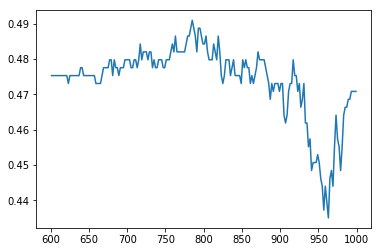

In [27]:
###  KNN Training  ###

scores = []
max_score = 0
for i in range(601,1000,2):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    acc = knn.score(X_test,y_test)
    scores.append(acc)
    if acc > max_score:
        max_score = acc
        bestn = i
print(max_score)
print(bestn)
sns.lineplot(x = list(range(601,1000,2)), y=scores)

In [29]:
svc = svm.SVC(kernel = 'poly', degree = 2)
svc.fit(X_train,y_train)
print('SVM Degree 2', svc.score(X_test,y_test))
print(classification_report(y_test,svc.predict(X_test)))

SVM Degree 2 0.984304932735426
             precision    recall  f1-score   support

          0       0.97      1.00      0.98       210
          1       1.00      0.97      0.98       236

avg / total       0.98      0.98      0.98       446



In [ ]:
"""

RECREATE 'SIZED' FOLDER    done
RESIZE                     done
START OVER                 done
APPLY TRANSFORMS TO BEGINNING DATASET WITH MULTIPROCESS      in progress
RESEARCH CONVOLUTIONAL NEURAL NETS FOR DEEP LEARNING  --  CUT IF NEEDED  --
APPLY KFOLD TO ORIGINAL MODELS (DEGREE = 2 AND GAMMA= WHATEVER FOR RBF SVC)

DATABASE -- SEND DATAFRAME TO AWS VIA DATABASE (GOOGLE)
FLASK -- GOOGLE IT, LOOK LATER INTO THE WEEK

"""